In [1]:
#importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
# Data - Collection & Pre-Process
car_data = pd.read_csv('car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car_data.shape

(301, 9)

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
# Check the distribution of All categorical value
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


## Encoding the categorical values

In [8]:
# Encode the 'Fuel_Type', columns
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)

# Encode the 'Seller_Type', columns
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)

# Encode the 'Transmission', columns
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)

In [9]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [10]:
## Seprate the data into label & Features
X = car_data.drop(columns=['Car_Name','Selling_Price'], axis=1)
Y = car_data['Selling_Price']

In [11]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [12]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Split the data train & test

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

In [14]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(301, 7) (270, 7) (31, 7)
(301,) (270,) (31,)


# 1. Train the model to Linear Regression

In [15]:
linear = LinearRegression()

In [16]:
linear.fit(X_train,Y_train)

LinearRegression()

## Evaluate the model by checking ERROR

In [17]:
# ERROR on train data
training_data_pred = linear.predict(X_train)
test_data_pred = linear.predict(X_test)

In [18]:
score_1 = metrics.r2_score(Y_train,training_data_pred)
print('R2 ERROR = ', score_1)

R2 ERROR =  0.8799451660493706


In [19]:
# ERROR on test data
score_2 = metrics.r2_score(Y_test,test_data_pred)
print('R2 ERROR = ', score_2)

R2 ERROR =  0.8365766715024756


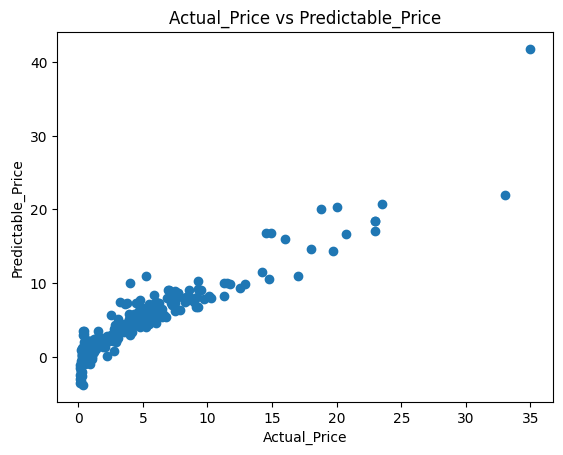

In [20]:
## Visulise the actual price & predictable rice
plt.scatter(x=Y_train,y=training_data_pred)
plt.xlabel('Actual_Price')
plt.ylabel('Predictable_Price')
plt.title('Actual_Price vs Predictable_Price')
plt.show()

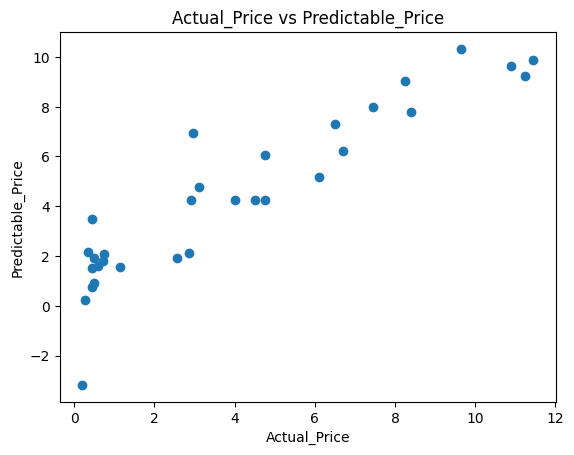

In [21]:
## Visulise the actual price & predictable rice
plt.scatter(x=Y_test,y=test_data_pred)
plt.xlabel('Actual_Price')
plt.ylabel('Predictable_Price')
plt.title('Actual_Price vs Predictable_Price')
plt.show()

# 2. Train the model to Lasso Regression

In [22]:
lasso = Lasso()

In [23]:
lasso.fit(X_train,Y_train)

Lasso()

## Evaluate the model by checking ERROR

In [24]:
# ERROR on train data
training_data_pred = lasso.predict(X_train)
test_data_pred = lasso.predict(X_test)

In [25]:
score_1 = metrics.r2_score(Y_train,training_data_pred)
print('R2 ERROR = ', score_1)

R2 ERROR =  0.8427856123435794


In [26]:
# ERROR on test data
score_2 = metrics.r2_score(Y_test,test_data_pred)
print('R2 ERROR = ', score_2)

R2 ERROR =  0.8709167941173195


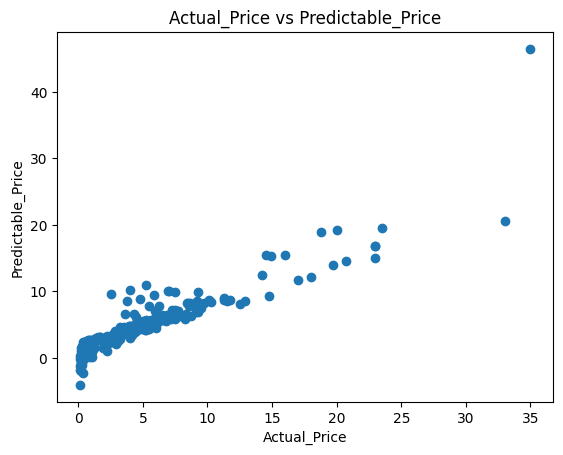

In [27]:
## Visulise the actual price & predictable rice
plt.scatter(x=Y_train,y=training_data_pred)
plt.xlabel('Actual_Price')
plt.ylabel('Predictable_Price')
plt.title('Actual_Price vs Predictable_Price')
plt.show()

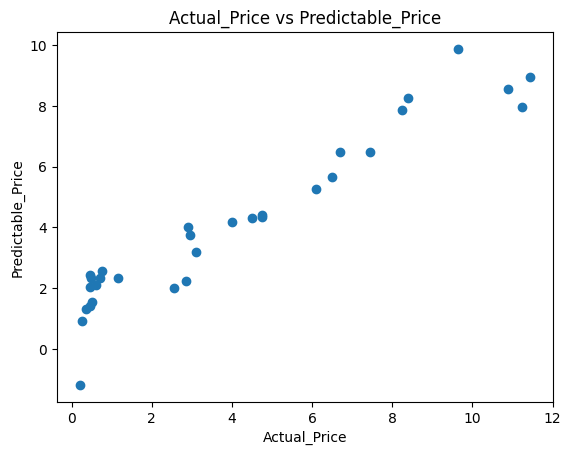

In [28]:
## Visulise the actual price & predictable rice
plt.scatter(x=Y_test,y=test_data_pred)
plt.xlabel('Actual_Price')
plt.ylabel('Predictable_Price')
plt.title('Actual_Price vs Predictable_Price')
plt.show()

In [29]:
linear.predict(X_test)

array([10.32892855,  0.77165673,  4.26482324,  4.78985002,  9.88701568,
        4.24823193,  6.92536953,  7.29321065,  0.21950514,  5.18527582,
        6.23823964,  6.07761019,  2.1716932 ,  7.77611973,  1.89987958,
        1.79635895,  2.10001123,  1.91953211,  9.24977006,  4.25291486,
        1.569912  ,  9.04949049,  1.52561157,  9.65418587,  0.89631315,
        7.99187626,  1.59929505, -3.17680912,  4.24653988,  2.1257015 ,
        3.49654935])

In [30]:
Y_test

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64

# Reduce the loss using Gradient Descent

In [31]:
from sklearn.linear_model import SGDRegressor

In [48]:
lr = 0.01
epochs = 50
redu_loss = SGDRegressor(alpha=0.0,max_iter=epochs,learning_rate='constant',eta0=lr)

In [49]:
redu_loss.fit(X_train,Y_train)

SGDRegressor(alpha=0.0, learning_rate='constant', max_iter=50)

In [50]:
train_loss = redu_loss.score(X_train,Y_train)
test_loss = redu_loss.score(X_test,Y_test)
print('Train data loss = ', train_loss)
print('Test data loss = ', test_loss)

Train data loss =  -2.5197788768611946e+34
Test data loss =  -1.0473596096123796e+34
